# NOrmality Test GPT

In [2]:
import os
import pandas as pd
from scipy.stats import shapiro

# Folder path containing the CSV files
folder_path = r'E:\Research work\assessment checker research\asap-aes\results_gpt'

# Initialize a dictionary to store normality test results
normality_results = {}

# Loop over each file from EssaySet1 to EssaySet6
for i in range(1, 7):
    file_name = f'EssaySet{i}_assessment_results_by_rubric.csv'
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the file exists
    if os.path.exists(file_path):
        # Read the CSV file
        data = pd.read_csv(file_path)
        
        # Special handling for EssaySet1
        if i == 1:
            data['domain1_score'] = data['domain1_score'] // 2
        
        # Fill missing values if the 'domain1_Point_gpt' column exists
        if 'domain1_Point_gpt' in data.columns:
            data['domain1_Score_gpt'] = data['domain1_Score_gpt'].fillna(data['domain1_Point_gpt'])
        
        # Select relevant columns and drop rows with missing values
        data = data[['domain1_score', 'domain1_Score_gpt']].dropna()
        
        # Perform Shapiro-Wilk normality test on both columns
        results = {
            "domain1_score": shapiro(data['domain1_score']),
            "domain1_Score_gpt": shapiro(data['domain1_Score_gpt'])
        }
        
        # Store results
        normality_results[f'EssaySet{i}'] = {
            col: {
                "Statistic": result.statistic,
                "p-value": result.pvalue,
                "Normality": "Yes" if result.pvalue > 0.05 else "No"
            } for col, result in results.items()
        }

# Convert results to a DataFrame for better visualization
summary_list = []
for essay_set, results in normality_results.items():
    for col, values in results.items():
        summary_list.append({
            "Essay Set": essay_set,
            "Column": col,
            "Statistic": values["Statistic"],
            "p-value": values["p-value"],
            "Normality": values["Normality"]
        })

summary_df = pd.DataFrame(summary_list)

# Save the results to an Excel file
output_path = "4_normality_test_results.xlsx"
summary_df.to_excel(output_path, index=False)

output_path


'4_normality_test_results.xlsx'

## Visualization

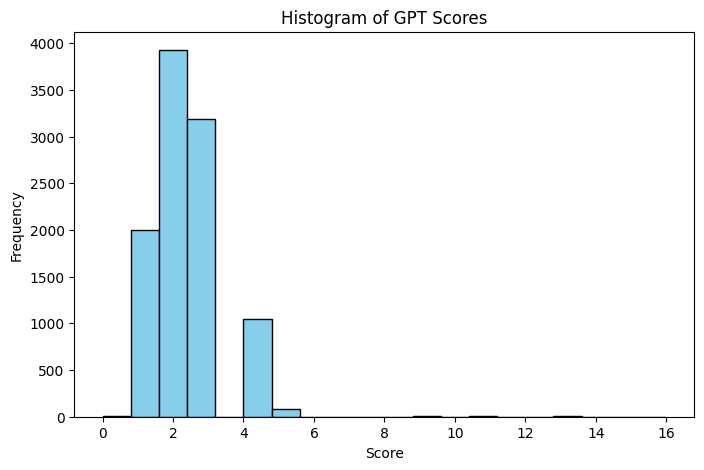

In [4]:
import matplotlib.pyplot as plt
# Initialize a list to store data for GPT plotting
gpt_scores = []

# Loop through the dataset files and extract GPT scores
for i in range(1, 7):
    file_name = f'EssaySet{i}_assessment_results_by_rubric.csv'
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the file exists
    if os.path.exists(file_path):
        # Read the CSV file
        data = pd.read_csv(file_path)
        
        # Collect GPT scores
        if 'domain1_Score_gpt' in data.columns:
            gpt_scores.extend(data['domain1_Score_gpt'].dropna().tolist())

# Plot histogram for GPT scores
plt.figure(figsize=(8, 5))
plt.hist(gpt_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of GPT Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()


# Normality TEst Gemini

In [5]:
import os
from scipy.stats import shapiro

# Folder path containing the CSV files for Gemini
folder_path_gemini = r'E:\Research work\assessment checker research\asap-aes\results_gemini'

# Initialize a dictionary to store normality test results for Gemini
normality_results_gemini = {}

# Loop over each file from EssaySet1 to EssaySet6
for i in range(1, 7):
    file_name = f'EssaySet{i}_assessment_results_by_rubric.csv'
    file_path = os.path.join(folder_path_gemini, file_name)
    
    # Check if the file exists
    if os.path.exists(file_path):
        # Read the CSV file
        data = pd.read_csv(file_path)
        
        # Special handling for EssaySet1
        if i == 1:
            data['domain1_score'] = data['domain1_score'] // 2
        
        # Fill missing values if the 'domain1_Point_gemini' column exists
        if 'domain1_Point_gemini' in data.columns:
            data['domain1_Score_gemini'] = data['domain1_Score_gemini'].fillna(data['domain1_Point_gemini'])
        
        # Select relevant columns and drop rows with missing values
        data = data[['domain1_score', 'domain1_Score_gemini']].dropna()
        
        # Perform Shapiro-Wilk normality test on both columns
        results = {
            "domain1_score": shapiro(data['domain1_score']),
            "domain1_Score_gemini": shapiro(data['domain1_Score_gemini'])
        }
        
        # Store results
        normality_results_gemini[f'EssaySet{i}'] = {
            col: {
                "Statistic": result.statistic,
                "p-value": result.pvalue,
                "Normality": "Yes" if result.pvalue > 0.05 else "No"
            } for col, result in results.items()
        }

# Convert results to a DataFrame for better visualization
summary_list_gemini = []
for essay_set, results in normality_results_gemini.items():
    for col, values in results.items():
        summary_list_gemini.append({
            "Essay Set": essay_set,
            "Column": col,
            "Statistic": values["Statistic"],
            "p-value": values["p-value"],
            "Normality": values["Normality"]
        })

summary_df_gemini = pd.DataFrame(summary_list_gemini)

# Save the results to an Excel file
output_path_gemini = "4_normality_test_results_gemini.xlsx"
summary_df_gemini.to_excel(output_path_gemini, index=False)

output_path_gemini


'4_normality_test_results_gemini.xlsx'

## Visualization

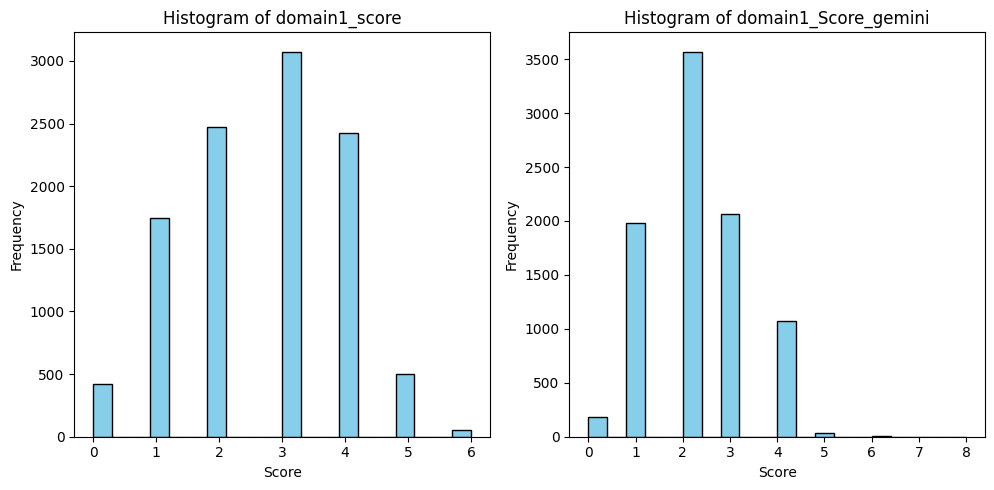

In [6]:
import matplotlib.pyplot as plt
# Initialize a list to store data for combined plotting
combined_data = {"domain1_score": [], "domain1_Score_gemini": []}

# Loop through the dataset files and extract the relevant columns
for i in range(1, 7):
    file_name = f'EssaySet{i}_assessment_results_by_rubric.csv'
    file_path = os.path.join(folder_path_gemini, file_name)
    
    # Check if the file exists
    if os.path.exists(file_path):
        # Read the CSV file
        data = pd.read_csv(file_path)
        
        # Special handling for EssaySet1
        if i == 1:
            data['domain1_score'] = data['domain1_score'] // 2
        
        # Fill missing values for the 'domain1_Score_gemini' column
        if 'domain1_Point_gemini' in data.columns:
            data['domain1_Score_gemini'] = data['domain1_Score_gemini'].fillna(data['domain1_Point_gemini'])
        
        # Collect data for histogram plotting
        if 'domain1_score' in data.columns:
            combined_data['domain1_score'].extend(data['domain1_score'].dropna().tolist())
        if 'domain1_Score_gpt' in data.columns:
            combined_data['domain1_Score_gpt'].extend(data['domain1_Score_gpt'].dropna().tolist())
        if 'domain1_Score_gemini' in data.columns:
            combined_data['domain1_Score_gemini'].extend(data['domain1_Score_gemini'].dropna().tolist())

# Plot histograms for combined data
plt.figure(figsize=(15, 5))

# Plot each column's histogram
for idx, (col, values) in enumerate(combined_data.items(), start=1):
    plt.subplot(1, 3, idx)
    plt.hist(values, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()
